# Decision trees

**Contents**

  1. ID3 algorithm and demonstration of basic idea on simple dataset.
  2. How to treat continous features, C4.5 algorithm.
  3. Beware of overfitting: example data, tunning the tree depth.
  4. Ensemble methods: bagging with random forests.
  5. Ensemble methods: boosting with gradient boosted trees.

[Here](http://scikit-learn.org/stable/modules/tree.html) is the `scikit-learn` manual on the `tree` package.

In [3]:
import math
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

## ID3 algorithm: basic idea of how the decision trees are constructed

  * Try to construct a decision tree for the simple_data.csv dataset.
  * Use greedy algorithm to minimize **information gain**, a measure based on **entropy**.

**Entropy**:

Let $S$ be a set of $N$ data points with discrete target variable with possible values $s_1, s_2, \ldots, s_k$ and let $p_i$ be a frequency of $s_i$ in $S$, i.e.,
$$
    p_i = \frac{\#\{ d = s_i \mid d \in S\}}{N}.
$$
Then the entropy of $S$ is the number
$$
    H(S) = - \sum_{i = 1}^k p_i \log_2 p_i.
$$
The units of entropy are called **bits**, the entropy is always a number between $0$ an $\log_2(k)$: $0$ corresponds to datasets that are not random at all, i.e., $p_i = 1$ for some $i$, $\log_2(k)$ corresponds to totally random datasets, i.e., $p_1 = p_2 = \cdots = p_k$.

Example, let $S$ be a dataset with a target variable with values $(0,0,1,0,2,0,1,0)$, this means that $N = 8$, $k = 3$, $s_1 = 0, s_2 = 1, s_3 = 2$ and  $p_1 = 5/8, p_2 = 2/8$ and $p_3 = 1/8$. The entropy is then
$$
    H(S) = -5/8 \log_2 (5/8) -2/8 \log_2 (2/8) - 1/8 \log_2 (1/8) = 1.2987949406953985,
$$
indeed:

In [4]:
-5/8*math.log2(5/8)-2/8*math.log2(2/8)-1/8*math.log2(1/8)

1.2987949406953985

Note that the maximum entropy for $k = 3$ is $\log_2(3) = 1.584962500721156$.

**Information gain**:

Now, imagine that we have a binary feature $X_1 = (1,1,0,1,1,0,1,0)$ along with our target variable $y = (0,0,1,0,2,0,1,0)$. 
We can now split our dataset $S$ into two parts using the rule $X_1 == 1$. 
The split of target variable reads
$$
    (0,0,0,2,1) \quad \text{and} \quad (1,0,0).
$$
In general, any rule(s) split the starting dataset with $N$ data points to $\ell$ disjoint subsets $T_1, T_2, \ldots, T_\ell$, put $t_i = \#(T_i)/N$, the information gain for this split is the number
$$
    IG(S,X_1) = H(S) - \sum_{j = 1}^\ell t_i H(T_i). 
$$

For our example the target variable of data points from $T_1$ are $(0,0,0,2,1)$ and $(1,0,0)$ for data points from $T_2$, this means that $\ell = 2$, $t_1 = 5/8$ and $t_2 = 3/8$. We get
$$
    IG(S,X_1) = H(S) - 5/8 H(T_1) - 3/8 H(T_2)
$$
ande since $H(S) = 1.2987949406953985$ and 
$$
    H(T_1) = -3/5 log_2 (3/5) - 1/5 \log_2(1/5) - 1/5 \log_2(1/5)
$$
and
$$
    H(T_2) = -2/3 log_2 (2/3) - 1/3 \log_2(1/3),
$$
we have
$$
    IG(S,X_1) = 0.17683800642685465,
$$
indeed:

In [5]:
HS = -5/8*math.log2(5/8)-2/8*math.log2(2/8)-1/8*math.log2(1/8) 
HT1 = -3/5*math.log2(3/5)-2*(1/5*math.log2(1/5))
HT2 = -2/3*math.log2(2/3)-1/5*math.log2(1/3)
print('H(T1) = ', HT1)
print('H(T2) = ', HT2)
HS - 5/8*HT1 - 3/8*HT2

H(T1) =  1.3709505944546687
H(T2) =  0.7069675006250021


0.17683800642685465

### TASK: ID3 algorithm to construct a decision tree

Use the ID3 algorithm to construct a decision tree of depth = 2 for the dataset `simple_data.csv` **by hand**.
  * ID3 algorithm in [lecture](https://edux.fit.cvut.cz/courses/MI-ADM/_media/lectures/04/adm_trees_gm_v2-public.pdf), [wikipedia](https://en.wikipedia.org/wiki/ID3_algorithm) and the [original paper](http://citeseer.ist.psu.edu/viewdoc/download;jsessionid=035CBEB886DADA672E4ECE45D007B3C1?doi=10.1.1.167.3624&rep=rep1&type=pdf) by J.R. Quinlan from 1986.
  * Decide whether the resulting tree is optimal. If not, try to find a better one. (Note that finding [the optimal decision tree is NP-complete](https://www.sciencedirect.com/science/article/pii/0020019076900958)).

In [6]:
# here we check our result using sklearn
data = pd.read_csv('simple_data.csv', sep=';')
display(data.head(16)) 
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2)
dt.fit(data.iloc[:,1:],data['T'])

,T,F1,F2,F3
0,1,1,0,0
1,1,0,1,1
2,1,1,0,0
3,1,1,1,1
4,0,0,0,1
5,0,0,1,0
6,0,0,0,1
7,0,1,1,0


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

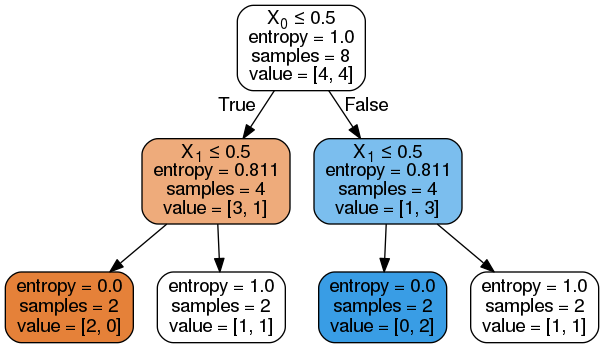

In [8]:
# we can plot the tree using Graphviz
# the Grapwhiz must be installed on your system, if you do not want to bother, use http://webgraphviz.com/
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

def plotTree(dt):
    dot_data = StringIO()
    tree.export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

plotTree(dt)

## Continuous features and C4.5 / C5.0 algorithm

  * The ID3 algorithm cannot deal with continuous features, however, its successor C4.5 (resp. C5.0) can:
    * Discretisation by giving a finite set of disjoint intervals.
    * Setting a decision boundary so that the split maximizes the information gain given by the resulting split.
    * Here is a book on C4.5 algorithm called [C4.5](https://www.amazon.de/C4-5-Programs-Machine-Learning-Kaufmann/dp/1558602380)!!

In [34]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics

%matplotlib inline

In [36]:
data2 = pd.read_csv('adult-census.csv')
data2.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [45]:
data2 = data2.replace('?', np.nan)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [52]:
#Xdata = data2.drop(columns=['income'])
#ydata = data2.income

In [53]:
from sklearn.tree import DecisionTreeClassifier
data2.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [54]:
data2.workclass.value_counts(dropna = False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
NaN                  1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [63]:
# ma jiny pomer, nevyhazoval bych je nestrane
display(data2[data2.workclass.isnull()].income.value_counts(normalize=True))
display(data2[data2.workclass.notnull()].income.value_counts(normalize=True))
display(data2.income.value_counts(normalize=True))

<=50K    0.895969
>50K     0.104031
Name: income, dtype: float64

<=50K    0.751017
>50K     0.248983
Name: income, dtype: float64

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

In [73]:
str_cols = data2.select_dtypes('category').columns
for col in str_cols:
    data2[col] = data2[col].astype('category')
    data2[col] = data2[col].cat.codes
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int8
fnlwgt            32561 non-null int64
education         32561 non-null int8
education.num     32561 non-null int64
marital.status    32561 non-null int8
occupation        32561 non-null int8
relationship      32561 non-null int8
race              32561 non-null int8
sex               32561 non-null int8
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null int8
income            32561 non-null int8
dtypes: int64(6), int8(9)
memory usage: 1.8 MB


In [74]:
data2.workclass.cat.codes.value_counts()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [75]:
data2.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,-1,77053,11,9,6,-1,1,4,0,0,4356,40,38,0
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38,0
2,66,-1,186061,15,10,6,-1,4,2,0,0,4356,40,38,0
3,54,3,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,15,10,5,9,3,4,0,0,3900,40,38,0


In [76]:
dt = DecisionTreeClassifier()
dt.fit(data2.drop(columns=['income']), data2.income)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
data2['native.country'].value_counts()

 38    29170
 25      643
-1       583
 29      198
 10      137
 1       121
 32      114
 7       106
 18      100
 4        95
 8        90
 22       81
 34       80
 2        75
 21       73
 5        70
 39       67
 12       64
 23       62
 30       60
 3        59
 35       51
 13       44
 19       43
 31       37
 26       34
 28       31
 9        29
 11       29
 6        28
 20       24
 16       20
 37       19
 0        19
 24       18
 36       18
 40       16
 27       14
 17       13
 15       13
 33       12
 14        1
Name: native.country, dtype: int64

The dataset is taken from Kaggel: [Adult Census Income](https://www.kaggle.com/uciml/adult-census-income/data), the target variable is in the last column.

In [11]:
display(data.info())
data2.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
T     8 non-null int64
F1    8 non-null int64
F2    8 non-null int64
F3    8 non-null int64
dtypes: int64(4)
memory usage: 336.0 bytes


None

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [12]:
# replacing '?' with NaN
data2 = data2.replace('?', np.nan)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
# categorical data as dtype = category
from pandas.api.types import CategoricalDtype
cat_columns = data2.columns[data2.nunique() < 50].drop('education.num')
for column in cat_columns:
    data2[column] = data2[column].astype('category')
edu_level = CategoricalDtype(categories=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ordered=True)
data2['education.num'] = data2['education.num'].astype(edu_level)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education.num     32561 non-null category
marital.status    32561 non-null category
occupation        30718 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null category
income            32561 non-null category
dtypes: category(10), int64(5)
memory usage: 1.6 MB


In [14]:
# transform categories to numbers as DecisionTreeClassifier cannot treat strings, also NaN is coded as -1
cat_columns = data2.select_dtypes(['category']).columns.drop('education.num')
data2[cat_columns] = data2[cat_columns].apply(lambda x: x.cat.codes)
for column in cat_columns:
    data2[column] = data2[column].astype('category')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null category
fnlwgt            32561 non-null int64
education         32561 non-null category
education.num     32561 non-null category
marital.status    32561 non-null category
occupation        32561 non-null category
relationship      32561 non-null category
race              32561 non-null category
sex               32561 non-null category
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null category
income            32561 non-null category
dtypes: category(10), int64(5)
memory usage: 1.6 MB


In [15]:
# education and education.num are the same
data2.drop(['education'], inplace = True, axis = 1, errors='ignore')
# data2 = data2.replace('-1', np.nan)

In [16]:
#data2 = data2.select_dtypes(include=['category'])
#display(data2.head())
X, Xtest, y, ytest = train_test_split(data2.iloc[:,:-1], data2.iloc[:,-1], test_size=0.25, random_state=33) 
display(X.shape)
display(y.shape)
display(ytest.shape)

(24420, 13)

(24420,)

(8141,)

In [17]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=70)
dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=70,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
print('accuracy_score (train): {0:.6f}'.format(metrics.accuracy_score(y, dt.predict(X))))
print('accuracy_score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))
if dt.get_params()['max_depth'] < 4:
    plotTree(dt)

accuracy_score (train): 0.999959
accuracy_score (test): 0.808623


In [19]:
depths = range(1,50)
train_acc = []
test_acc = []
for depth in depths:
    dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=depth)
    dt.fit(X,y)
    train_acc.append(metrics.accuracy_score(y, dt.predict(X)))
    test_acc.append(metrics.accuracy_score(ytest, dt.predict(Xtest)))

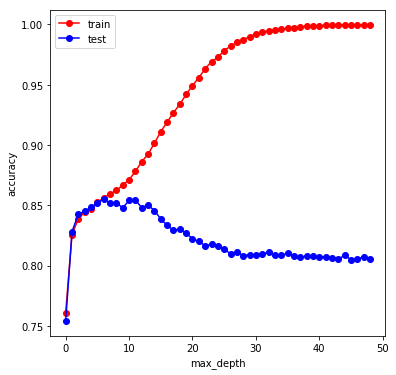

In [20]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

### TASK: experiment with hyperparameters to avoid overfitting / improve performance

  * See the [list of parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) of DecisionTreeClassifier

## Ensemble methods: bagging with random forests

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf = RandomForestClassifier(n_estimators=1000, max_features=5, max_depth=2)
rf.fit(X,y)
print('accuracy_score (train): {0:.6f}'.format(metrics.accuracy_score(y, rf.predict(X))))
print('accuracy_score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, rf.predict(Xtest))))
rf.get_params()

accuracy_score (train): 0.814865
accuracy_score (test): 0.810957


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Regression with decision trees
  
  * Decision trees can be used even if the target variable is numeric (continuous).
  * Splits are now selected to minimize weighted sample variance (or similar loss function). We split a dataset $S$ into $\ell$ subsets $T_1, \ldots, T_\ell$ so that the following value is the least possible:
  $$
     \sum_{i = 1}^\ell t_i \sum_{d \in T_i} (y_d - \overline{y}_{T_i})^2,
  $$
  where $\overline{y}_{T_i}$ is the mean of the target variable $y$ within $T_i$ and $t_i = \frac{\#(T_i)}{\#(S)}$.
  * As the predicted value the mean of the resulting leaf is taken.

In [23]:
from sklearn.tree import DecisionTreeRegressor

We use data where the target variable is the SalePrice for a house and features are some parameters of houses.
  * It is again from [kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).
  * We use a version of dataset cleaned and modified in MI-PDD course.

In [24]:
# loading regression data
data3 = pd.read_csv('data-houses.csv', index_col=0)
data3.drop(['Id'], axis=1, inplace=True)
display(data3.head())
display(data3.info())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SqrtGrLivArea,LogGrLivArea,SqrtGarageArea,LogGarageArea,SqrtWoodDeckSF,LogWoodDeckSF,SqrtOpenPorchSF,LogOpenPorchSF,SqrtPoolArea,LogPoolArea
1344,60,85.0,11103,7,5,2006,2006,0.0,0,0,...,38.157568,7.284135,20.976177,6.089045,0.000000,0.000000,0.000000,0.00000,0.0,0.0
265,20,78.0,12090,6,6,1981,1981,210.0,588,228,...,37.709415,7.260523,24.000000,6.357842,16.613248,5.624018,0.000000,0.00000,0.0,0.0
997,20,0.0,11717,6,6,1970,1970,571.0,0,0,...,37.973675,7.274480,24.799194,6.423247,19.261360,5.918894,0.000000,0.00000,0.0,0.0
824,20,81.0,11216,8,5,2006,2006,0.0,0,0,...,38.587563,7.306531,27.856777,6.655440,0.000000,0.000000,11.832160,4.94876,0.0,0.0
985,190,68.0,10880,5,5,1950,1950,0.0,1040,0,...,34.117444,7.060476,15.491933,5.484797,0.000000,0.000000,6.928203,3.89182,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1344 to 623
Data columns (total 64 columns):
MSSubClass          1095 non-null int64
LotFrontage         1095 non-null float64
LotArea             1095 non-null int64
OverallQual         1095 non-null int64
OverallCond         1095 non-null int64
YearBuilt           1095 non-null int64
YearRemodAdd        1095 non-null int64
MasVnrArea          1095 non-null float64
BsmtFinSF1          1095 non-null int64
BsmtFinSF2          1095 non-null int64
BsmtUnfSF           1095 non-null int64
TotalBsmtSF         1095 non-null int64
1stFlrSF            1095 non-null int64
2ndFlrSF            1095 non-null int64
LowQualFinSF        1095 non-null int64
GrLivArea           1095 non-null int64
BsmtFullBath        1095 non-null int64
BsmtHalfBath        1095 non-null int64
FullBath            1095 non-null int64
HalfBath            1095 non-null int64
BedroomAbvGr        1095 non-null int64
KitchenAbvGr        1095 non-null int64
TotRmsA

None

In [25]:
X, Xtest, y, ytest = train_test_split(data3.drop(['SalePrice'], axis = 1), data3.SalePrice, test_size=0.25, random_state=333)
print(X.shape)
print(Xtest.shape)

(821, 63)
(274, 63)


In [26]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
# Linear Regression
ols = LinearRegression()
ols.fit(X, y) 

# Print RMSLE
print('Root mean squared logarithmic error:', np.sqrt(mean_squared_error(ols.predict(Xtest), ytest)))

Root mean squared logarithmic error: 0.13461674925213246


In [27]:
dtr = DecisionTreeRegressor(max_depth=60)
dtr.fit(X,y)
print('Root mean squared logarithmic error:', np.sqrt(mean_squared_error(dtr.predict(Xtest), ytest)))

Root mean squared logarithmic error: 0.229619104960601


In [28]:
depths = range(1,50)
train_acc = []
test_acc = []
for depth in depths:
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X,y)
    train_acc.append(np.sqrt(mean_squared_error(dtr.predict(X), y)))
    test_acc.append(np.sqrt(mean_squared_error(dtr.predict(Xtest), ytest)))

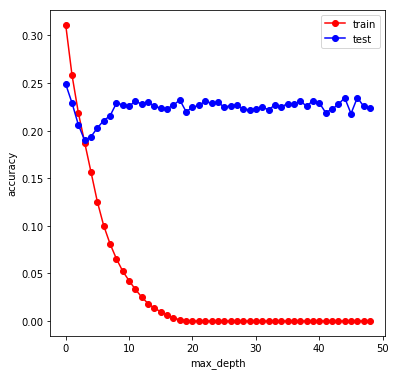

In [29]:
plt.figure(figsize=(6,6))
plt.plot(train_acc,'or-')
plt.plot(test_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

Root mean squared logarithmic error: 0.2289751183531496


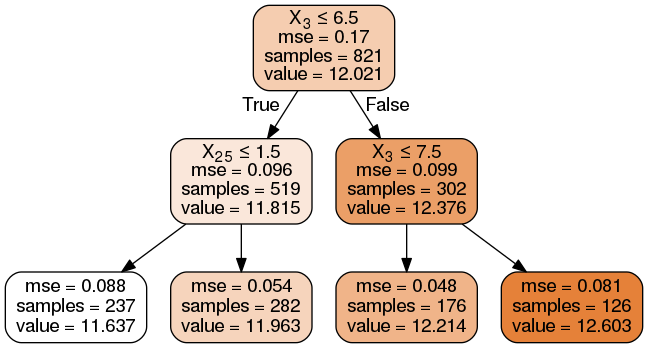

In [30]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X,y)
print('Root mean squared logarithmic error:', np.sqrt(mean_squared_error(dtr.predict(Xtest), ytest)))
plotTree(dtr)

## Gradient boosted trees

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gbt = GradientBoostingRegressor(learning_rate=0.2, n_estimators=10000, max_depth=2, verbose=1)
gbt.fit(X,y)
print('Root mean squared logarithmic error (train):', np.sqrt(mean_squared_error(gbt.predict(X), y)))
print('Root mean squared logarithmic error (test):', np.sqrt(mean_squared_error(gbt.predict(Xtest), ytest)))

      Iter       Train Loss   Remaining Time 
         1           0.1329           44.42s
         2           0.1063           40.52s
         3           0.0875           40.48s
         4           0.0730           38.39s
         5           0.0619           37.79s
         6           0.0531           38.50s
         7           0.0460           38.20s
         8           0.0406           36.64s
         9           0.0364           36.72s
        10           0.0331           37.29s
        20           0.0187           32.35s
        30           0.0145           30.08s
        40           0.0123           26.88s
        50           0.0113           24.48s
        60           0.0104           22.90s
        70           0.0096           21.73s
        80           0.0089           20.90s
        90           0.0084           20.23s
       100           0.0079           19.72s
       200           0.0050           17.74s
       300           0.0031           16.72s
       40

## XGBoost

* Can be installed using `pip install xgboost`,
* the list of hyperparameters can be found here: https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

In [33]:
import xgboost

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgbt = xgboost.sklearn.XGBRegressor(max_depth=3, n_estimators=1000, verbosity=1, objective='reg:linear', gamma=0.1, learning_rate=0.1)
xgbt.fit(X,y)
print('Root mean squared logarithmic error (train):', np.sqrt(mean_squared_error(xgbt.predict(X), y)))
print('Root mean squared logarithmic error (test):', np.sqrt(mean_squared_error(xgbt.predict(Xtest), ytest)))